# <center> Projet Pizzaïo’jo</center>

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import shapiro

In [2]:
df = pd.read_excel('pizza.xlsx')

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


Ce premier aperçu de notre jeu de données indique qu'il n'y a pas de valeurs manquantes.

In [5]:
df.describe()

,order_details_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


La fonction describe me permet d'obtenir des statistiques de mes variables numériques.  
On peut remarquer que les commandes passées contiennent au **minimum 1 pizza et maximum 4 pizzas**.  
Il est aussi indiqué que **la pizza la moins chère vaut 9,75€ et la plus chère vaut 35.95€**.  
Enfin on remarque aussi que **le montant minumum pour la colonne total_price est de 9.75€ et le montant maximum est de 83€**.

In [6]:
# J'extrais l'année, le mois et le jour de ma colonne order_date 
# et je fusion également dans une nouvelle colonne les colonnes order_date et order_time
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day_name()
df['combined_datetime'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'].astype(str))

In [7]:
print(df['month'].unique())
print(df['year'].unique())
print(df['day'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2015]
['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


Notre jeu de données présente des données de commandes allant du lundi au dimanche.  
Or la consigne indique :   
***" Du mardi au vendredi, les clients peuvent se régaler, en se rendant à la sortie métro Joliette entre
11h et 21h. "*** 

Je décide de retirer de mon dataframe les données de samedi, dimanche, lundi.

ferie = ['Saturday','Sunday','Monday']
df.loc[~df['day'].isin(ferie)]['day'].unique()


df = df.loc[~df['day'].isin(ferie),:]

## Informations de base :
### a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de données ?

In [8]:
df['pizza_id'].nunique()

91

Il existe **91 types de pizzas uniques** (car une même pizza est proposé sous différentes tailles).

### b. Combien de commandes uniques (order_id distincts) figurent dans le jeu de données ?

In [9]:
df['order_id'].nunique()

21350

Le jeu de données compte **12774 commandes passées**.

## 3. Analyse temporelle :
### a. Quelle est la plage de dates dans le jeu de données ?

In [10]:
df['order_date'].min()

Timestamp('2015-01-01 00:00:00')

In [11]:
df['order_date'].max()

Timestamp('2015-12-31 00:00:00')

In [12]:
df['order_time'].min()

datetime.time(9, 52, 21)

In [13]:
df['order_time'].max()

datetime.time(23, 5, 52)

**Le jeu de données s'étend entre le 1er janvier 2015 et le 31 décembre 2015 avec comme plage horaire 9h-23h.**

On remarque que des commandes sont passées avant et après les horaires d'ouverture et fermeture mais cela peut s'expliquer par un pic d'activité.  
C'est la raison pour laquelle je décide de garder ces données.

### b. Combien de commandes ont été passées chaque jour ?

In [14]:
df_order_day = df.groupby('order_date')['order_id'].count().reset_index()
df_order_day = df_order_day.set_index('order_date')
df_order_day


,order_id
order_date,
2015-01-01,161
2015-01-02,160
2015-01-03,154
2015-01-04,106
2015-01-05,121
...,...
2015-12-27,87
2015-12-28,102
2015-12-29,77


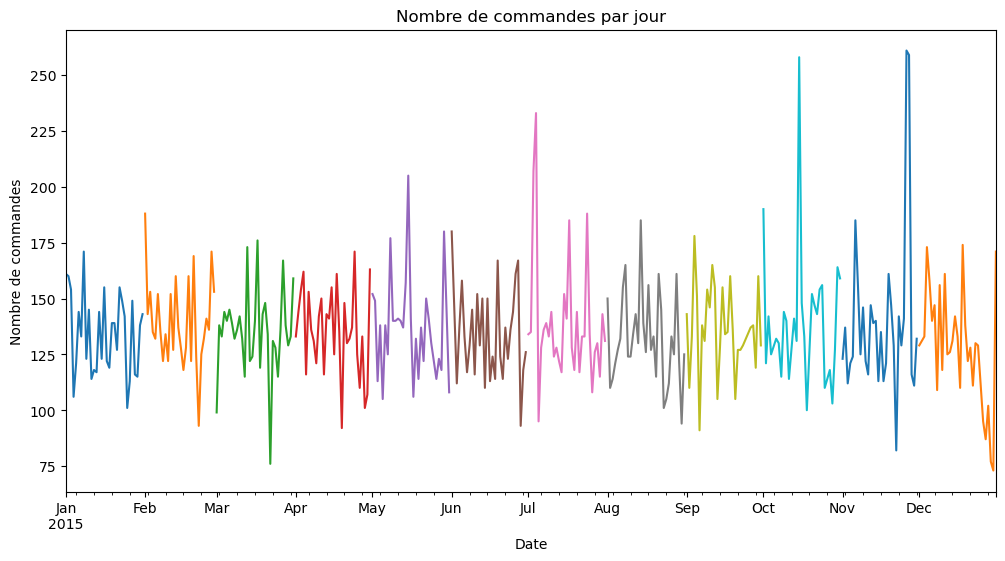

In [15]:
df_order_day.resample('M')['order_id'].plot(figsize=(12,6))
plt.title('Nombre de commandes par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de commandes')
plt.show()

Ce graphique nous indique qu'il y a eu 3 pics d'activités en juillet,octobre et novembre 2015 et une baisse d'activité au mois de mars et de décembre.

### c. Quelle est la durée moyenne pour traiter une commande ?

Notre jeu de données affiche uniquement l'heure de la prise de la commande mais nous n'avons pas d'indication sur l'heure à laquelle la commande a été traitée.  
J'ai pris la décision de calculer l'intervale de temps entre chaque commande afin d'obtenir une moyenne mais il est important de préciser que ces résultats seront biaisés car on ne tient pas compte des périodes d'inactivités entre 2 commandes.

In [16]:
df['order_time'] = pd.to_datetime(df['order_time'], format="%H:%M:%S")

# Fonction pour calculer l'intervalle de temps entre chaque commande
def calculate_time_difference(row):
    if calculate_time_difference.prev_time is None:
        calculate_time_difference.prev_time = row
        return pd.Timedelta(0)
    else:
        time_difference = row - calculate_time_difference.prev_time
        calculate_time_difference.prev_time = row
        return time_difference

calculate_time_difference.prev_time = None

df['time_difference'] = df['order_time'].apply(calculate_time_difference)
df.groupby('order_id')['time_difference'].mean()

order_id
1              0 days 00:00:00
2       0 days 00:03:48.800000
3              0 days 00:07:24
4              0 days 00:04:03
5              0 days 00:04:59
                 ...          
21346          0 days 00:01:36
21347   0 days 00:05:52.500000
21348          0 days 00:02:51
21349          0 days 00:46:44
21350          0 days 00:52:11
Name: time_difference, Length: 21350, dtype: timedelta64[ns]

In [17]:
print('La durée moyenne de traitement d\'une commande est de : ',df.groupby('order_id')['time_difference'].max().mean())

La durée moyenne de traitement d'une commande est de :  0 days 00:05:25.668009367


## 4. Analyse de la quantité :
### a. Quelle est la quantité moyenne de pizzas commandées ?

In [18]:
print('La quantité moyenne de pizzas commandées est:', df.groupby('order_id')['quantity'].mean().mean())

La quantité moyenne de pizzas commandées est: 1.0137464377932761


### b. Quelle est la taille de pizza la plus fréquemment commandée ?

In [19]:
print("Tailles de pizza proposées :",df['pizza_size'].unique())

Tailles de pizza proposées : ['M' 'L' 'S' 'XL' 'XXL']


In [20]:
df['pizza_size'].describe()

count     48620
unique        5
top           L
freq      18526
Name: pizza_size, dtype: object

In [21]:
df['pizza_size'].value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

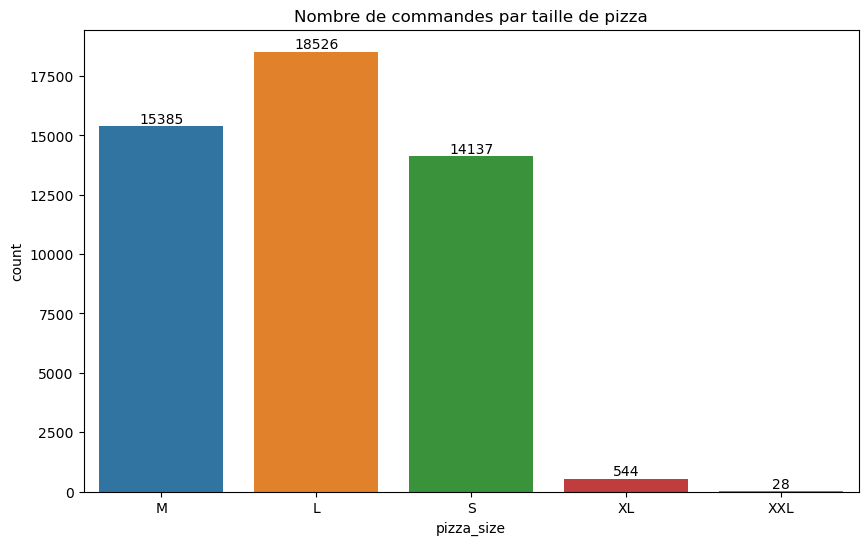

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df,x=df['pizza_size'])
ax.bar_label(ax.containers[0])
plt.title('Nombre de commandes par taille de pizza')
plt.show()

La taille de pizza la plus fréquemment commandée est la taille **"L"**.

### c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

In [23]:
print("Liste des catégories de pizza:",df['pizza_category'].unique())

Liste des catégories de pizza: ['Classic' 'Veggie' 'Supreme' 'Chicken']


In [24]:
df['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

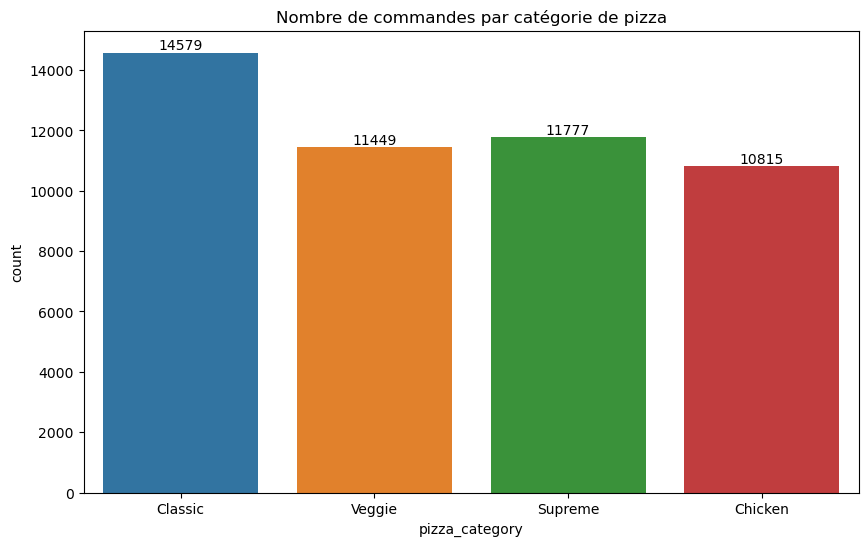

In [25]:
plt.figure(figsize=(10, 6))
ax_1 = sns.countplot(data=df,x=df['pizza_category'])
ax_1.bar_label(ax_1.containers[0])
plt.title('Nombre de commandes par catégorie de pizza')
plt.show()

La catégorie de pizza la plus commandée est la **Classic**.

## 5. Analyse des prix :
### a. Quel est le prix unitaire moyen des pizzas ?

In [26]:
print("Prix moyen d'une pizza classé par catégorie et par taille")
round(df.groupby(['pizza_category','pizza_size'])['unit_price'].mean().sort_values(),2)

Prix moyen d'une pizza classé par catégorie et par taille


pizza_category  pizza_size
Classic         S             11.38
Veggie          S             12.16
Chicken         S             12.75
Supreme         S             14.05
Classic         M             14.74
Veggie          M             15.94
Supreme         M             16.43
Chicken         M             16.75
Classic         L             18.38
Veggie          L             19.30
Supreme         L             20.65
Chicken         L             20.75
Classic         XL            25.50
                XXL           35.95
Name: unit_price, dtype: float64

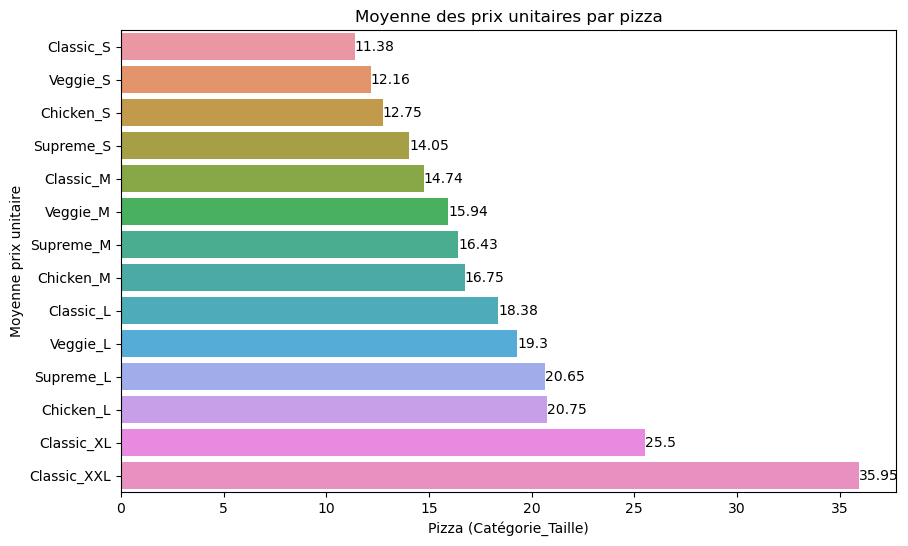

In [27]:
df['pizza_cat_size'] = df['pizza_category'] + '_' + df['pizza_size']
df_pizza_unite = round(df.groupby('pizza_cat_size')['unit_price'].mean().sort_values(), 2).reset_index()
df_pizza_unite.columns = ['pizza_cat_size', 'Moyenne prix unitaire']


plt.figure(figsize=(10, 6))
ax_2=sns.barplot(data=df_pizza_unite,y=df_pizza_unite['pizza_cat_size'], x=df_pizza_unite['Moyenne prix unitaire'],orient= "h")
ax_2.bar_label(ax_2.containers[0])

plt.xlabel('Pizza (Catégorie_Taille)')
plt.ylabel('Moyenne prix unitaire')
plt.title('Moyenne des prix unitaires par pizza')

plt.show()

In [28]:
print("Prix moyen d'une pizza (categories et tailles confondues) :",round(df['unit_price'].mean(),2))

Prix moyen d'une pizza (categories et tailles confondues) : 16.49


### b. Quel est le prix total moyen d'une commande ?

In [29]:
round(df.groupby('order_id')['total_price'].mean().mean(),2)

16.73

### c. Quelle pizza a le prix unitaire le plus élevé ?

In [30]:
df.loc[df['unit_price']==df['unit_price'].max()][['pizza_name','pizza_size','unit_price']].head(1)

,pizza_name,pizza_size,unit_price
3447,The Greek Pizza,XXL,35.95


## 6. Répartition par taille et catégorie :
### a. Combien de pizzas de chaque taille ont été vendues ?

In [31]:
df.groupby(['pizza_size'])['quantity'].sum()

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

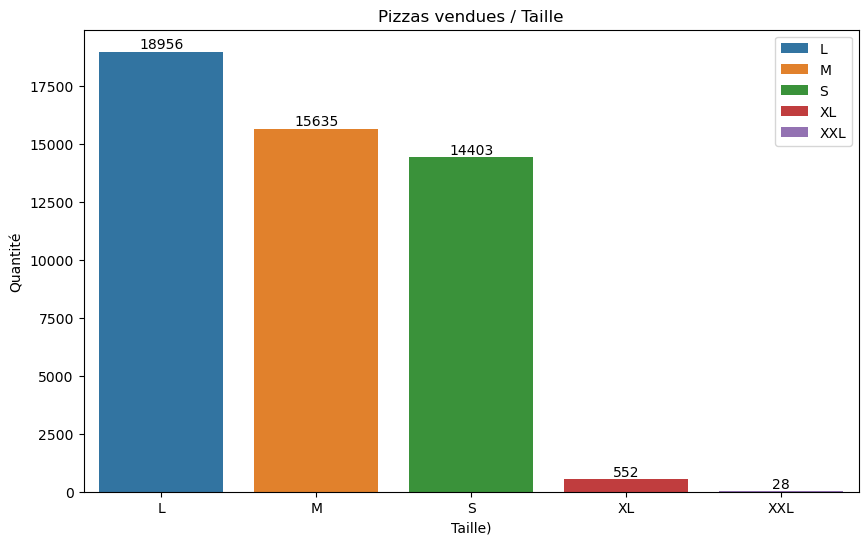

In [32]:
df_pizza_taille = df.groupby(['pizza_size'])['quantity'].sum().reset_index()
label = df_pizza_taille['pizza_size'].unique()
plt.figure(figsize=(10, 6))
ax_3=sns.barplot(data=df_pizza_taille,x=df_pizza_taille['pizza_size'], y=df_pizza_taille['quantity'],label=label)
ax_3.bar_label(ax_3.containers[0])
plt.legend()
plt.xlabel('Taille)')
plt.ylabel('Quantité')
plt.title('Pizzas vendues / Taille')

plt.show()

### b. Combien de pizzas y a-t-il dans chaque catégorie ?

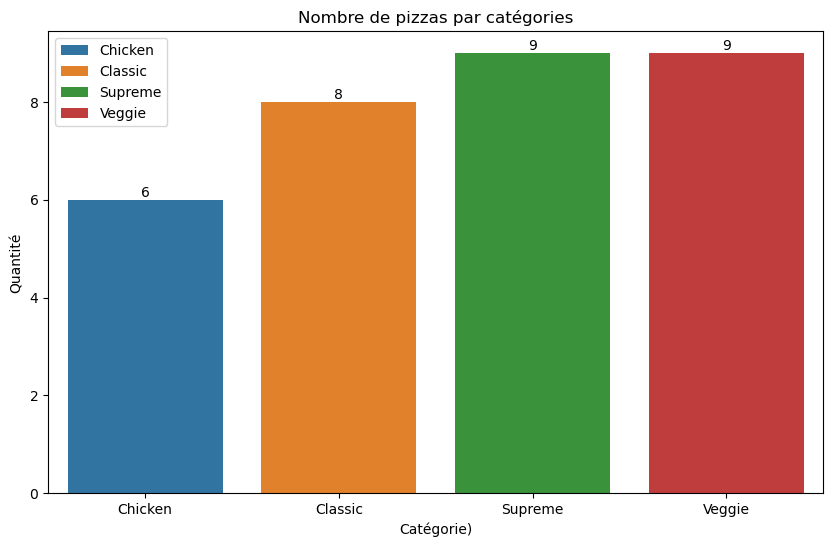

In [33]:
pie = df.groupby(['pizza_category'])['pizza_name'].nunique().reset_index()
pie_label = pie['pizza_category'].unique()

plt.figure(figsize=(10, 6))
ax_4=sns.barplot(data=pie,x=pie['pizza_category'], y=pie['pizza_name'],label=pie_label)
ax_4.bar_label(ax_4.containers[0])

plt.legend()
plt.xlabel('Catégorie)')
plt.ylabel('Quantité')
plt.title('Nombre de pizzas par catégories')

plt.show()

## 7. Analyse des ingrédients :
### a. Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?

In [34]:
# Utiliser explode pour séparer les listes d'ingrédients
df_exploded = df['pizza_ingredients'].str.split(', ').explode()

# Utiliser value_counts pour compter les occurrences de chaque ingrédient
ingredient_counts = df_exploded.value_counts()

# Afficher les résultats
print("Top 5 des ingrédients les plus utilisés : ",ingredient_counts[:10])

Top 5 des ingrédients les plus utilisés :  pizza_ingredients
Garlic               27422
Tomatoes             26601
Red Onions           19547
Red Peppers          16284
Mozzarella Cheese    10333
Pepperoni            10300
Spinach              10012
Mushrooms             9624
Chicken               8443
Capocollo             6572
Name: count, dtype: int64


### b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,pepperoni, champignons) ?

In [35]:
ingredient = 'Spinach'
result = df.loc[df['pizza_ingredients'].str.contains(ingredient)]
unique_pizza_names = result['pizza_name'].unique()
print("Nombre de pizza(s):",result['pizza_name'].nunique())
print("Liste des noms de pizzas contenant",ingredient,":", unique_pizza_names)

Nombre de pizza(s): 8
Liste des noms de pizzas contenant Spinach : ['The Spinach Supreme Pizza' 'The Green Garden Pizza'
 'The Spinach Pesto Pizza' 'The Vegetables + Vegetables Pizza'
 'The California Chicken Pizza' 'The Chicken Pesto Pizza'
 'The Mediterranean Pizza' 'The Spinach and Feta Pizza']


## 8. Détails de la commande :
### a. Quelle est la répartition du nombre de pizzas par commande ?

In [36]:
df_repartition = round(df.groupby('order_id')['quantity'].sum().value_counts(normalize=True),4).reset_index()
df_repartition.sort_values('proportion',ascending=False)

,quantity,proportion
0,1,0.3799
1,2,0.2881
2,3,0.1502
3,4,0.1462
4,5,0.0068
5,6,0.0037
6,8,0.0031
7,14,0.0031
8,9,0.0030
9,7,0.0029


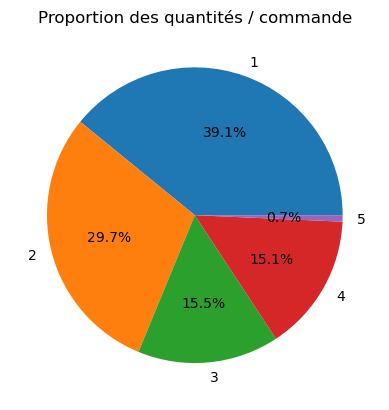

In [37]:
df_pie = df.groupby('order_id')['quantity'].sum().value_counts().to_dict()
df_pie = dict(list(df_pie.items())[:5])

plt.pie(df_pie.values(), labels=df_pie.keys(),autopct='%.1f%%')
plt.title('Proportion des quantités / commande')        
plt.show()

### b. Quelle est la répartition des prix totaux pour les commandes ?

In [38]:
df['total_price'].describe()

count    48620.000000
mean        16.821474
std          4.437398
min          9.750000
25%         12.750000
50%         16.500000
75%         20.500000
max         83.000000
Name: total_price, dtype: float64

<Axes: >

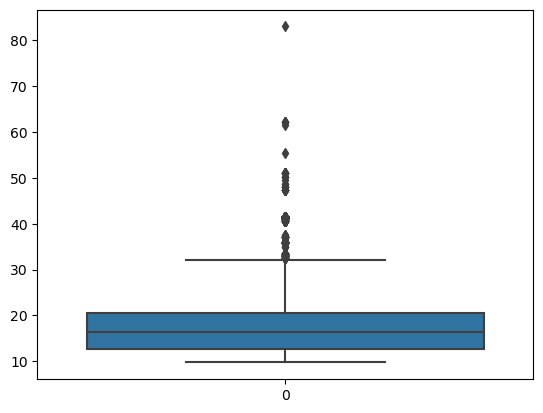

In [39]:
sns.boxplot(df['total_price'])

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


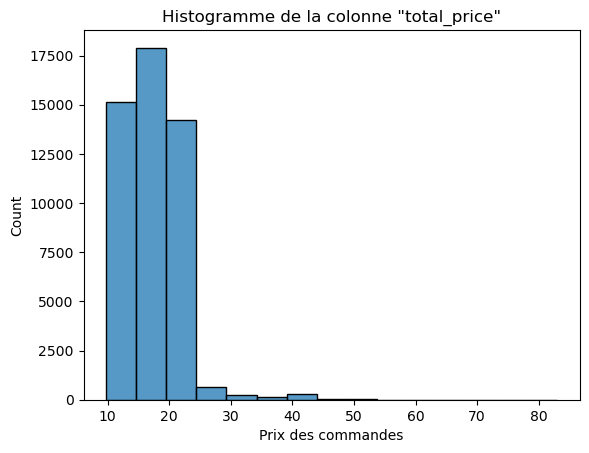

In [72]:
sns.histplot(df['total_price'],bins=15)
plt.xlabel('Prix des commandes')
plt.title('Histogramme de la colonne "total_price"')
plt.show()

Ces graphiques nous indiquent que la majorité des commandes sont comprises entre : **15€-20€**

## 9. Analyse du chiffre d’affaires en fonction du temps :
### a. Quel est le chiffre d'affaires quotidien ?

In [41]:
df.groupby(['order_date'])['total_price'].sum()

order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: total_price, Length: 358, dtype: float64

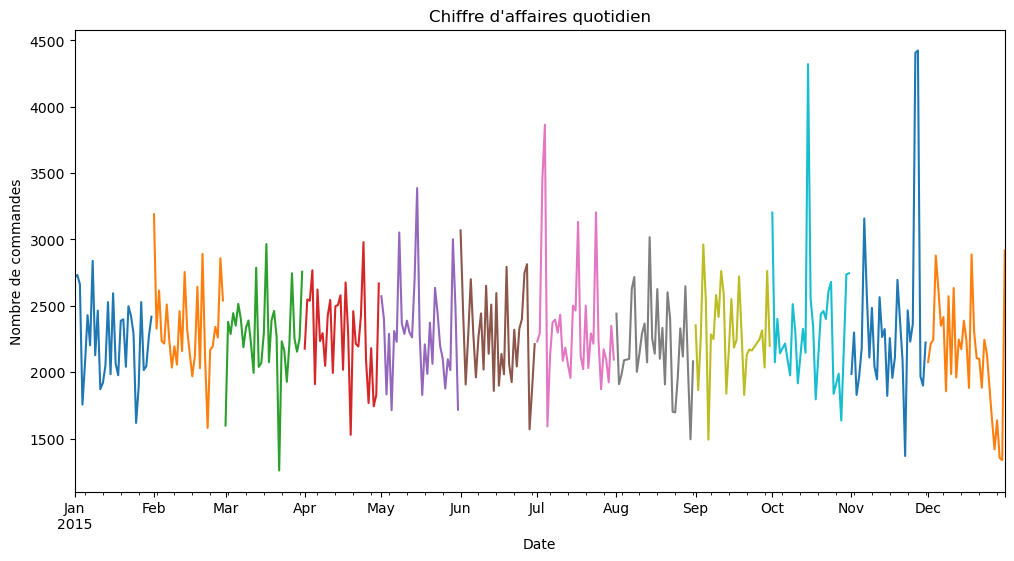

In [42]:
df_order_price = df.groupby('order_date')['total_price'].sum().reset_index()
df_order_price = df_order_price.set_index('order_date')
df_order_price
df_order_price.resample('M')['total_price'].plot(figsize=(12,6))
plt.title('Chiffre d\'affaires quotidien')
plt.xlabel('Date')
plt.ylabel('Nombre de commandes')
plt.show()

### b. Y a-t-il une corrélation entre l'heure de la journée et le total de la commande ?

Pour pouvoir vérifier si l'heure est corrélée au montant du chiffre d'affaires de la journée, il faut effectuer un test de corrélation. Ce test ne peut être cohérant que si les données suivent une loi normale.  
Pour vérifier cela, je réalise un histogramme de ma variable ainsi qu'un test de Shapiro-Wilk.  
Dans notre cas, je vais extraire les heures de la colonne **order_time** et réaliser une ANOVA (Analyse de la variance).

In [43]:
df['hours'] = df['order_time'].dt.hour

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


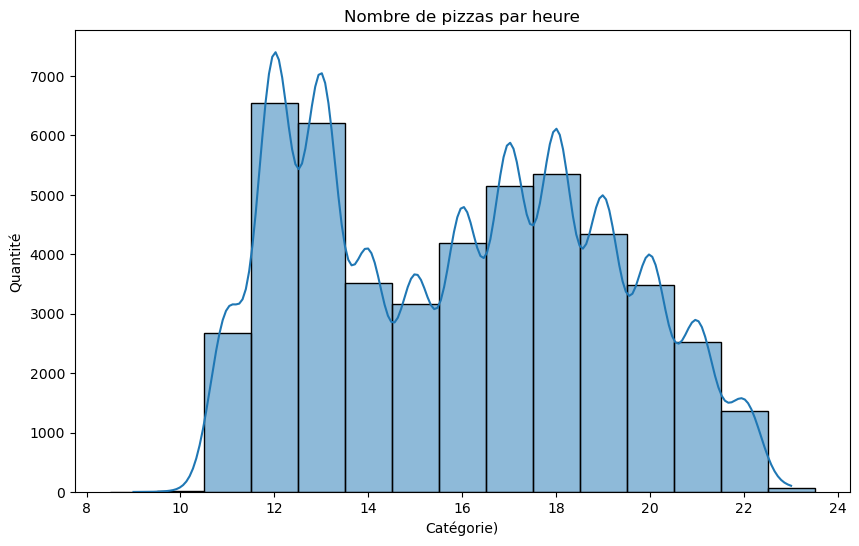

In [44]:
plt.figure(figsize=(10, 6))
ax_5=sns.histplot(df,x=df['hours'].astype("category"), kde=True)
ax_5.bar_label(ax_5.containers[0])

plt.xlabel('Catégorie)')
plt.ylabel('Quantité')
plt.title('Nombre de pizzas par heure')

plt.show()

In [45]:
# Test de normalité Shapiro-Wilk 
stat1, p_value1 = shapiro(df['hours'])

# Test de normalité Shapiro-Wilk pour variable2
stat2, p_value2 = shapiro(df['total_price'])

# Affichage des résultats
print(f"Variable 1 - Statistique de test : {stat1}, p-valeur : {p_value1}")
print(f"Variable 2 - Statistique de test : {stat2}, p-valeur : {p_value2}")


Variable 1 - Statistique de test : 0.9448150992393494, p-valeur : 0.0
Variable 2 - Statistique de test : 0.8489103317260742, p-valeur : 0.0


C:\Users\sarah\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Ce graphique nous montre que cette variable n'a pas une distribution normale.  
De plus le test de Shapiro-Wilk avec une p-value de 0.0 confirme que les variables ne suivent pas une distribution normale.
De ce fait, elle ne répond pas au critère pour appliquer une ANOVA.

In [46]:
df.groupby('hours')['total_price'].sum()

hours
9         83.00
10       303.65
11     44935.80
12    111877.90
13    106065.70
14     59201.40
15     52992.30
16     70055.40
17     86237.45
18     89296.85
19     72628.90
20     58215.40
21     42029.80
22     22815.15
23      1121.35
Name: total_price, dtype: float64

<Axes: xlabel='hours', ylabel='total_price'>

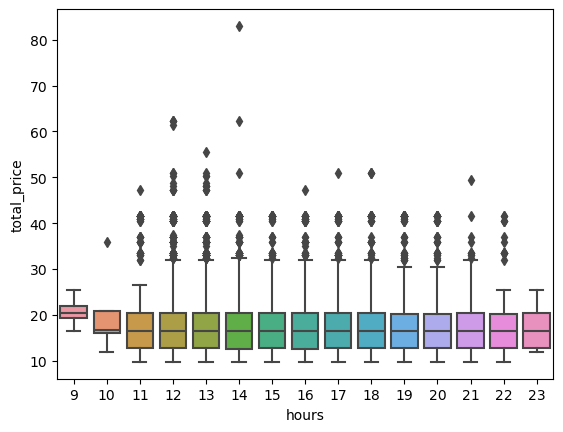

In [47]:
sns.boxplot(data=df,x=df['hours'],y=df['total_price'])

L’ANOVA compare la variance entre les groupes à celle à l’intérieur des groupes (**la variance intra-groupe**).  

Si la variance entre les groupes est **supérieure à la variance intra-groupe**, la variable explicative a un effet plus important que l’erreur aléatoire (due à la variance intra-groupe). La variable explicative est donc susceptible d’influencer significativement la variable réponse.

Le boxplot montre à première vue très peu de variance entre les heures excepté pour la plage de 9h (mais qui ne représente qu'une commande de 
4 pizzas que l'on peut considérer comme un outlier et ne pas en tenir compte.)  


## 10.Pizzas populaires :
### a. Quelles sont les 5 pizzas les plus commandées en quantité ?

In [48]:
df.groupby(['pizza_category','pizza_name','pizza_size'])['quantity'].count().sort_values(ascending=False)[:5]


pizza_category  pizza_name                pizza_size
Classic         The Big Meat Pizza        S             1811
Chicken         The Thai Chicken Pizza    L             1365
Veggie          The Five Cheese Pizza     L             1359
                The Four Cheese Pizza     L             1273
Classic         The Classic Deluxe Pizza  M             1159
Name: quantity, dtype: int64

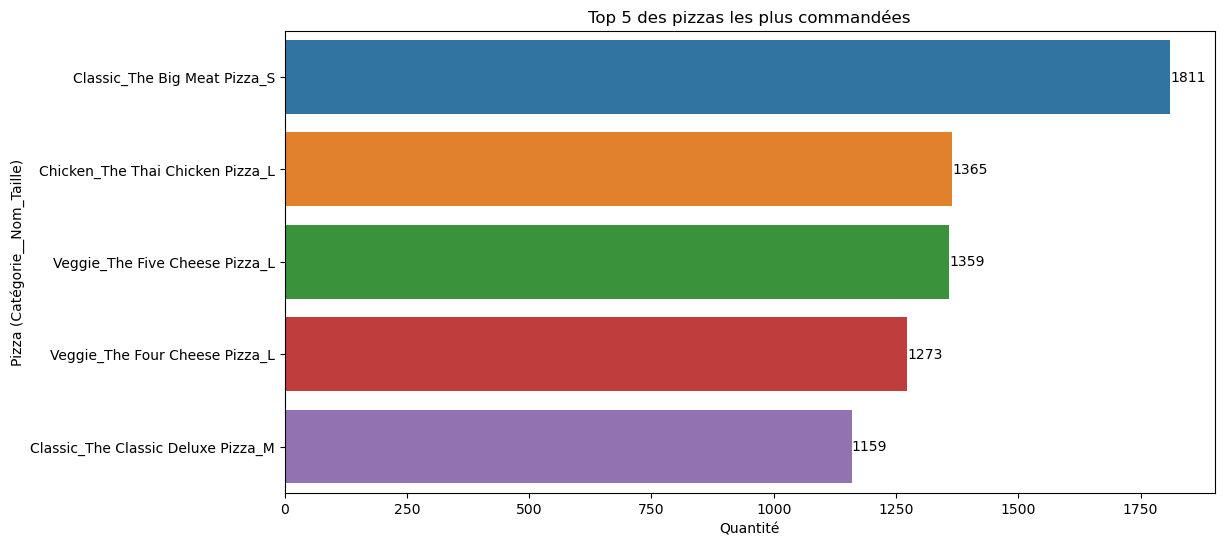

In [49]:
df['pizza_cat_name_size'] = df['pizza_category'] + '_' +df['pizza_name'] + '_' + df['pizza_size']
df_pizza_cat = round(df.groupby('pizza_cat_name_size')['quantity'].count().sort_values(ascending=False)[:5], 2).reset_index()
df_pizza_cat.columns = ['pizza_cat_name_size', 'quantite']


plt.figure(figsize=(12, 6))
ax_5=sns.barplot(data=df_pizza_cat,y=df_pizza_cat['pizza_cat_name_size'], x=df_pizza_cat['quantite'],orient= "h")
ax_5.bar_label(ax_5.containers[0])

plt.ylabel('Pizza (Catégorie__Nom_Taille)')
plt.xlabel('Quantité')
plt.title('Top 5 des pizzas les plus commandées')

plt.show()

### b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre d'affaires ?

In [50]:
df.groupby(['pizza_category','pizza_name','pizza_size'])['unit_price'].sum().sort_values(ascending=False)[:5]

pizza_category  pizza_name               pizza_size
Chicken         The Thai Chicken Pizza   L             28323.75
Veggie          The Five Cheese Pizza    L             25141.50
                The Four Cheese Pizza    L             22850.35
Supreme         The Spicy Italian Pizza  L             22576.00
Classic         The Big Meat Pizza       S             21732.00
Name: unit_price, dtype: float64

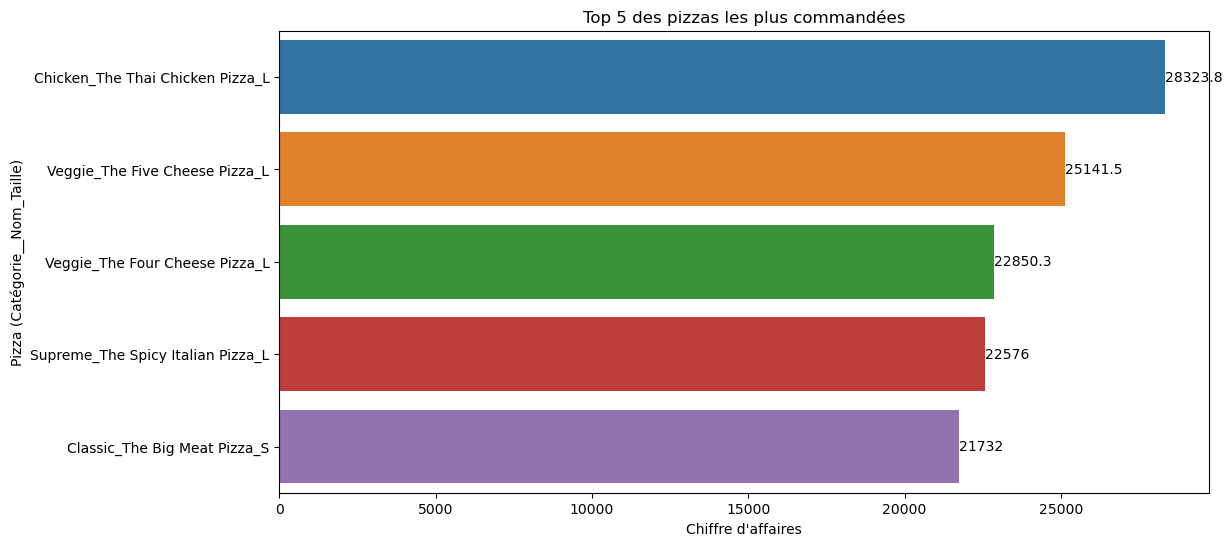

In [51]:
df_pizza_unit = round(df.groupby('pizza_cat_name_size')['unit_price'].sum().sort_values(ascending=False)[:5], 2).reset_index()
df_pizza_unit.columns = ['pizza_cat_name_size', 'CA']


plt.figure(figsize=(12, 6))
ax_6=sns.barplot(data=df_pizza_unit,y=df_pizza_unit['pizza_cat_name_size'], x=df_pizza_unit['CA'],orient= "h")
ax_6.bar_label(ax_6.containers[0])

plt.ylabel('Pizza (Catégorie__Nom_Taille)')
plt.xlabel('Chiffre d\'affaires')
plt.title('Top 5 des pizzas les plus commandées')

plt.show()

## 11.Chiffre d'affaires par taille et catégorie :
 ### a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

In [52]:
df.groupby(['pizza_size'])['unit_price'].sum().sort_values(ascending=False)

pizza_size
L      366862.1
M      245409.5
S      174794.5
XL      13872.0
XXL      1006.6
Name: unit_price, dtype: float64

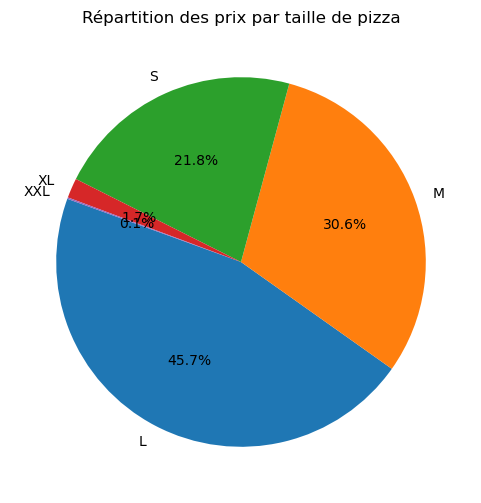

In [53]:
grouped_data = df.groupby(['pizza_size'])['unit_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=160)
plt.title('Répartition des prix par taille de pizza')
plt.show()

### b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de pizza ?

In [54]:
df.groupby(['pizza_category'])['unit_price'].sum().sort_values(ascending=False)

pizza_category
Classic    215732.60
Supreme    204486.75
Chicken    191527.25
Veggie     190198.10
Name: unit_price, dtype: float64

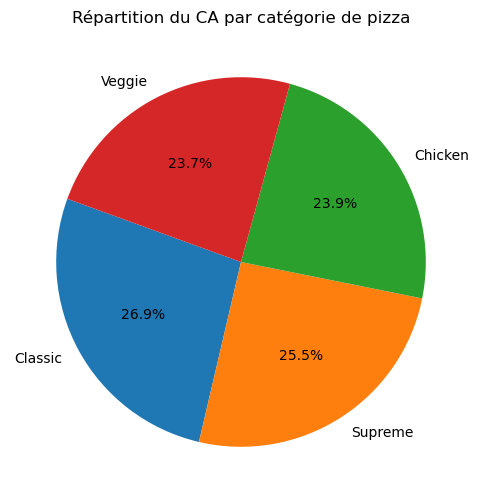

In [55]:
grouped_data_1 = df.groupby(['pizza_category'])['unit_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 6))
plt.pie(grouped_data_1, labels=grouped_data_1.index, autopct='%1.1f%%', startangle=160)
plt.title('Répartition du CA par catégorie de pizza')
plt.show()

## 12.Corrélation entre prix et quantité :
### a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


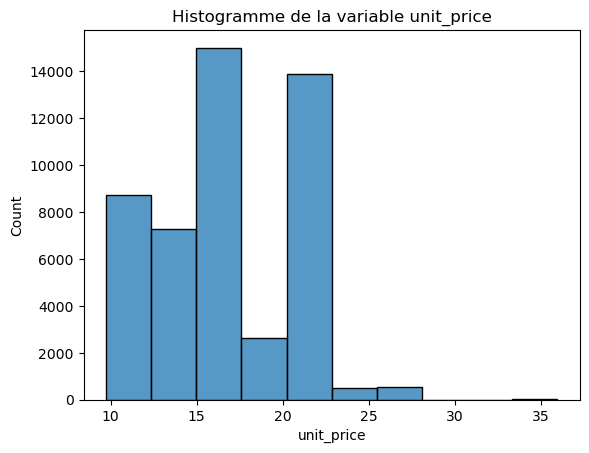

In [73]:
sns.histplot(df['unit_price'],bins=10)
plt.title('Histogramme de la variable unit_price')
plt.show()

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


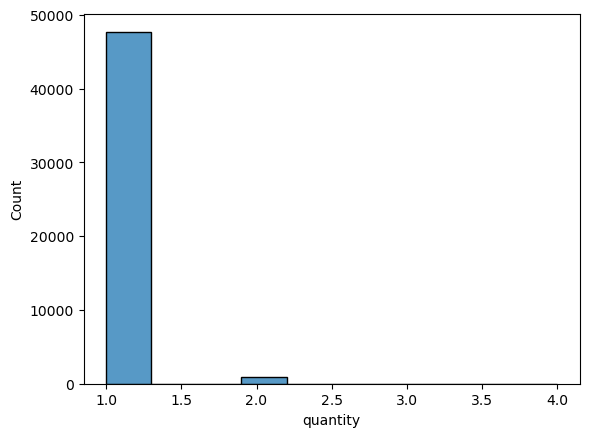

In [74]:
sns.histplot(df['quantity'],bins=10)
plt.show()

In [58]:
# Test de normalité Shapiro-Wilk 
stat1, p_value1 = shapiro(df['unit_price'])

# Test de normalité Shapiro-Wilk pour variable2
stat2, p_value2 = shapiro(df['quantity'])

# Affichage des résultats
print(f"Variable 1 - Statistique de test : {stat1}, p-valeur : {p_value1}")
print(f"Variable 2 - Statistique de test : {stat2}, p-valeur : {p_value2}")


Variable 1 - Statistique de test : 0.9221740365028381, p-valeur : 0.0
Variable 2 - Statistique de test : 0.11491048336029053, p-valeur : 0.0


C:\Users\sarah\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Les tests de Shapiro-Wilk ainsi que les histogrammes nous montrent à nouveau que nos données n'ont pas de distribution normale et de ce fait nous ne pouvons pas réaliser d'anova.

In [59]:
df['quantity'].unique()

array([1, 2, 3, 4], dtype=int64)

<Axes: xlabel='quantity', ylabel='unit_price'>

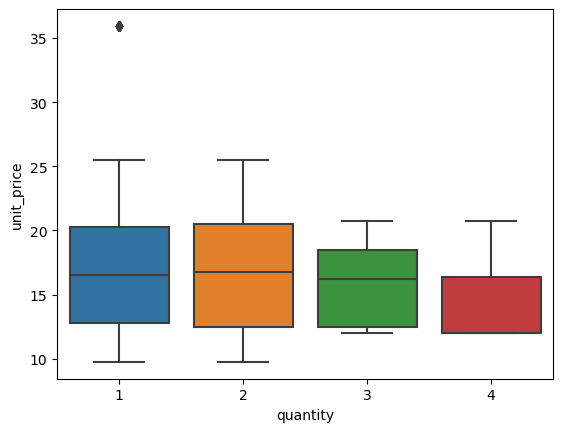

In [60]:
sns.boxplot(data=df,x=df['quantity'],y=df['unit_price'])

### b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?

In [61]:
df.groupby('pizza_size')['unit_price'].mean()

pizza_size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64

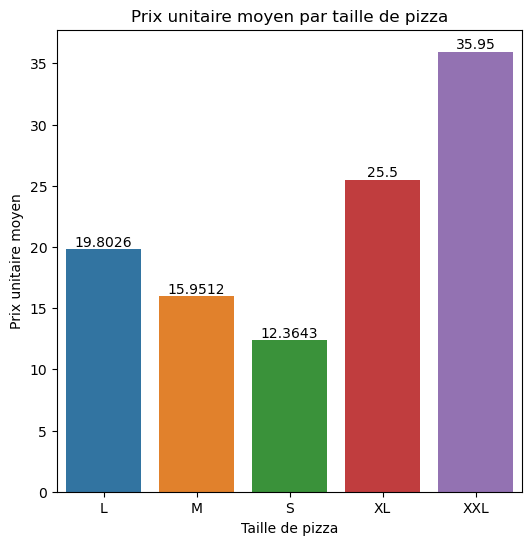

In [62]:
grouped_data_2 = df.groupby(['pizza_size'])['unit_price'].mean().reset_index()
plt.figure(figsize=(6, 6))
ax_7=sns.barplot(grouped_data_2,x=grouped_data_2['pizza_size'],y=grouped_data_2['unit_price'] )
ax_7.bar_label(ax_7.containers[0])
plt.title('Prix unitaire moyen par taille de pizza')
plt.xlabel('Taille de pizza')
plt.ylabel('Prix unitaire moyen')
plt.show()

## 13.Tendances saisonnières :
### a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?

In [63]:
df['quarter'] = df['order_date'].dt.quarter

In [64]:
dict = {1 : 'Hiver', 2 : 'Printemps', 3: 'Ete', 4 : 'Automne'}
df = df.replace({"quarter": dict})

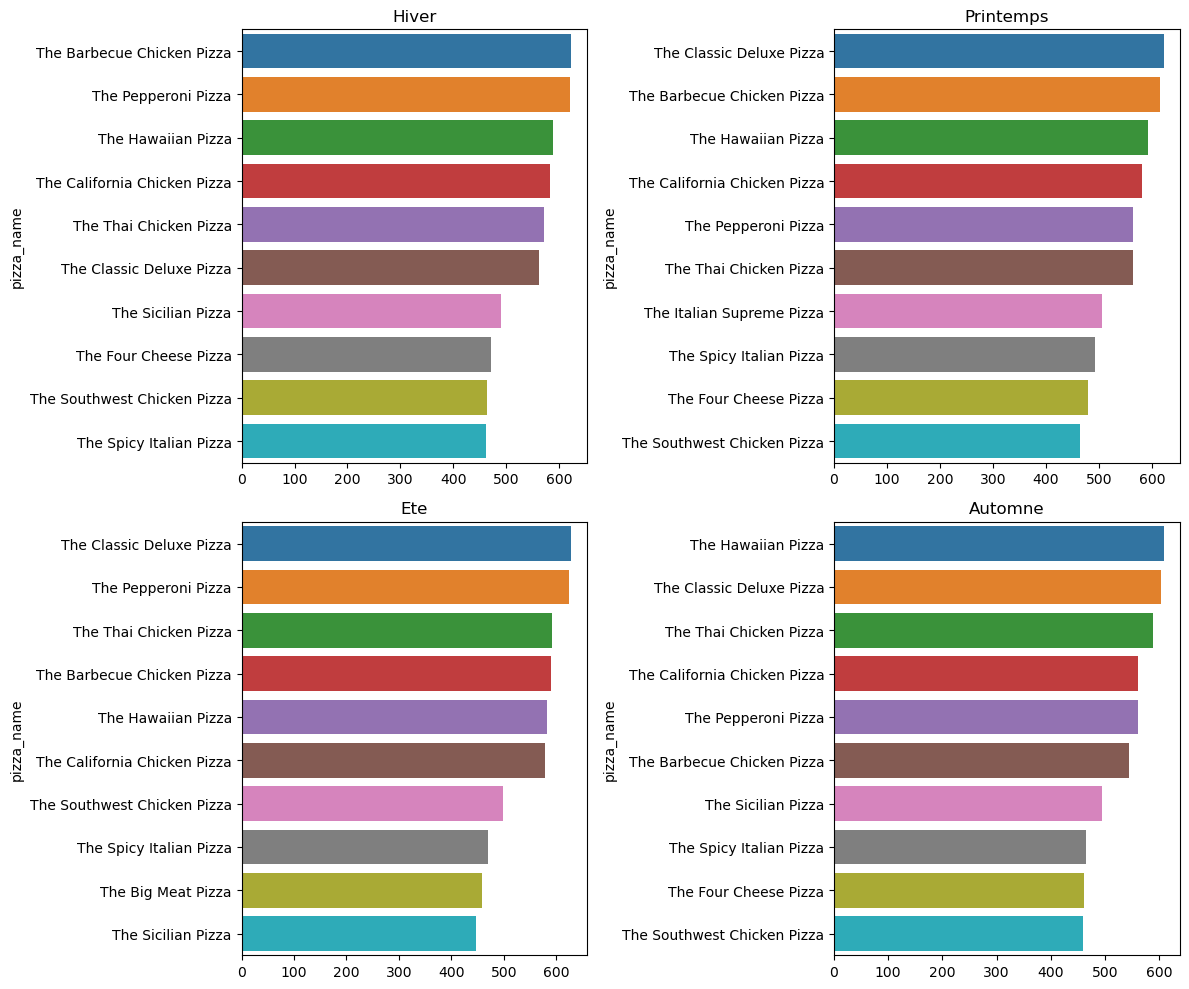

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Liste des saisons
saisons = ['Hiver', 'Printemps', 'Ete', 'Automne']

# Itération sur chaque saison et création du barplot correspondant
for i, saison in enumerate(saisons):
    data_season = df.loc[df['quarter'] == saison, ['pizza_name']].value_counts()[:10]
    sns.barplot(x=data_season.values, y=data_season.index.get_level_values(0), ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(saison)

# Ajustez la disposition
plt.tight_layout()
plt.show()


D'après ces graphiques, il ne semble pas y avoir de tendances car nous retrouvons dans le top 5 les mêmes pizzas peut-importe la saison.

### b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de commandes ?

Pour savoir s'il y a une corrélation entre une le jour de la semaine et la quantité de commandes

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day', ylabel='Count'>

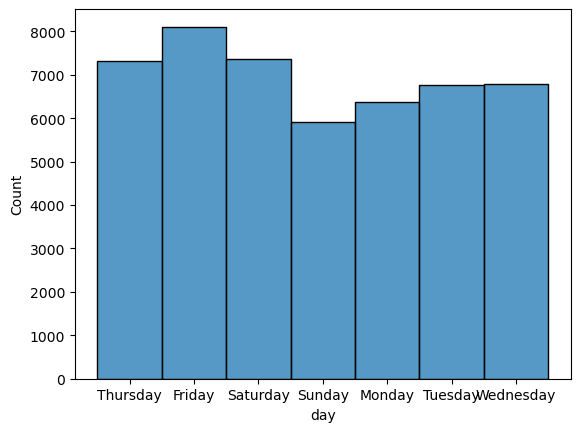

In [66]:
sns.histplot(df['day'],bins=1)

In [67]:
df_day = df.groupby('day')['order_id'].count().reset_index()
df_day

,day,order_id
0,Friday,8106
1,Monday,6369
2,Saturday,7355
3,Sunday,5917
4,Thursday,7323
5,Tuesday,6753
6,Wednesday,6797


In [68]:
df['day'] = pd.Categorical(df['day'], categories=['Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True)

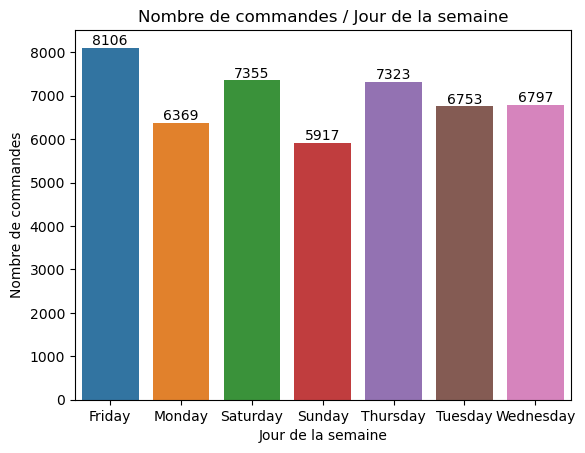

In [69]:
ax_8=sns.barplot(data=df_day,x=df_day['day'],y=df_day['order_id'])
ax_8.bar_label(ax_8.containers[0])
plt.title('Nombre de commandes / Jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de commandes')
plt.show()

Même si nos données ne suivent pas une distribution normale, ce graphique nous montre que le vendredi les commandes ont tendances a augmenter. 